# Natural Language Processing (NLP) with TensorFlow
* modules needed tensorflow, keras.preprocessing, numpy, tensorflow-datasets

Week 1 & 2:
* 1. understanding how words in sentences were coded into index
* 2. understanding how the matrix fit to neural network, and forecast
* 3. understanding subwords

Week 3:
* LSTMs

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [125]:
ms = ['I really love my dog dog dog my love', 
     'My dog loves my little bunny']

In [126]:
# tokenizer takes only num_words -1 words based on the frequency
tokenizer = Tokenizer(oov_token = '<oov>', num_words = 3)
tokenizer.fit_on_texts(ms)
word_index = tokenizer.word_index
print(word_index)

{'<oov>': 1, 'my': 2, 'dog': 3, 'love': 4, 'i': 5, 'really': 6, 'loves': 7, 'little': 8, 'bunny': 9}


In [127]:
message = tokenizer.texts_to_sequences(ms)
message

[[1, 1, 1, 2, 1, 1, 1, 2, 1], [2, 1, 1, 2, 1, 1]]

In [6]:
test_ms = ['I am testing my love']

In [7]:
tokenizer.texts_to_sequences(test_ms)

[[4, 1, 1, 2, 6]]

In [8]:
message = tokenizer.texts_to_sequences(ms)
message

[[4, 5, 6, 2, 3], [2, 3, 7, 2, 8, 9]]

In [9]:
message1 = pad_sequences(message, padding = 'post', maxlen = 4, )
message1

array([[5, 6, 2, 3],
       [7, 2, 8, 9]], dtype=int32)

In [ ]:
# Neural network model example

In [24]:
vocab_size = 1000
max_length = 16
embedding_dim = 16

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])


In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 16, 16)            16000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 1542      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 17,549
Trainable params: 17,549
Non-trainable params: 0
_________________________________________________________________


In [46]:
#!pip install -q tensorflow-datasets

In [10]:
print(tf.__version__)

2.0.0


In [11]:
import tensorflow_datasets as tfds

In [52]:
imdb, info = tfds.load("imdb_reviews", with_info = True, as_supervised = True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /Users/hong/tensorflow_datasets/imdb_reviews/plain_text/0.1.0. Subsequent calls will reuse this data.


In [53]:
import numpy as np
train_data, text_data = imdb['train'], imdb['test']
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []


In [57]:
for s, l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
for s, l in text_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [78]:
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = 'oov'

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, truncating = trunc_type)

In [160]:
len(word_index)

86539

In [79]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [80]:

print(decode_review(padded[0]))
print(training_sentences[0])

b this is the most oov film i have ever seen i first saw it as a child and even thinking about it now really oov me i know it was set in a time when life was hard and i know these people were poor and the oov were oov yes i get all that what i find hard to take is i can't remember one single light moment in the entire film maybe it was true to life i don't know i'm quite sure the acting was top oov and the direction and quality of oov etc etc was wonderful and i know that every film can't have a happy ending but as a family film it is
b"This is the most depressing film I have ever seen. I first saw it as a child and even thinking about it now really upsets me. I know it was set in a time when life was hard and I know these people were poor and the crops were vital. Yes, I get all that. What I find hard to take is I can't remember one single light moment in the entire film. Maybe it was true to life, I don't know. I'm quite sure the acting was top notch and the direction and quality of 

In [81]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 11526     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 27,533
Trainable params: 27,533
Non-trainable params: 0
_________________________________________________________________


In [82]:
num_epoch = 10
model.fit(padded, training_labels_final, epochs = num_epoch, validation_data = (testing_padded, testing_labels_final))


Train on 50000 samples, validate on 25000 samples
Epoch 1/10
50000/50000 [==============================] - 16s 324us/sample - loss: 0.4608 - accuracy: 0.7709 - val_loss: 0.4223 - val_accuracy: 0.8015
Epoch 2/10
50000/50000 [==============================] - 14s 285us/sample - loss: 0.3111 - accuracy: 0.8726 - val_loss: 0.4906 - val_accuracy: 0.7841
Epoch 3/10
50000/50000 [==============================] - 15s 290us/sample - loss: 0.1991 - accuracy: 0.9297 - val_loss: 0.6753 - val_accuracy: 0.7558
Epoch 4/10
50000/50000 [==============================] - 15s 301us/sample - loss: 0.1142 - accuracy: 0.9640 - val_loss: 0.8636 - val_accuracy: 0.7508
Epoch 5/10
50000/50000 [==============================] - 15s 299us/sample - loss: 0.0613 - accuracy: 0.9828 - val_loss: 1.1507 - val_accuracy: 0.7453
Epoch 6/10
50000/50000 [==============================] - 15s 292us/sample - loss: 0.0337 - accuracy: 0.9908 - val_loss: 1.4413 - val_accuracy: 0.7414
Epoch 7/10
50000/50000 [====================

In [85]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)


In [86]:
import io
out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [101]:
i = 998
print(reverse_word_index[i])
print(weights[i])


era
[ 0.2271215  -0.1588689  -0.10844458  0.09987214 -0.06229327  0.28513464
  0.4180902   0.14746661 -0.07856593 -0.12027813  0.00349138 -0.1546871
 -0.12788294 -0.0937545   0.03234789  0.13130184]


In [139]:
# from this 16 dimensional data to PCA
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components = 1)
p = pca.fit_transform(weights)

In [140]:
p = pd.DataFrame(p)

# Sarcasm dataset

In [1]:
import json, urllib
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


vocab_size = 10000
max_length = 32
embedding_dim = 16
trunc_type = 'post'
padding_type = 'post'
oov_tok = 'oov'
#training_size = 20000

In [2]:
# access sarcasm json file via url
url = "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json"
response = urllib.request.urlopen(url)
data = json.loads(response.read())

In [3]:
# creating arrays for model
sentences = []
labels = []

for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [4]:
sentences

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way',
 "advancing the world's women",
 'the fascinating case for eating lab-grown meat',
 'this ceo will send your kids to school, if you work for his company',
 'top snake handler leaves sinking huckabee campaign',
 "friday's morning email: inside trump's presser for the ages",
 'airline passengers tackle man who rushes cockpit in bomb threat',
 'facebook reportedly working on healthcare features and apps',
 "north korea praises trump and urges us voters to reject 'dull hillary'",
 "actually, cnn's jeffrey lord has been 'indefensible' for a while",
 'barcelona holds huge protest in su

In [6]:
#split training and testing sets
from sklearn.model_selection import train_test_split
training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(sentences, labels, test_size = 0.33)

In [7]:
#training_sentences = sentences[0:training_size]
#training_labels = labels[0:training_size]
#testing_sentences = sentences[training_size:]
#testing_labels = labels[training_size:]


In [8]:
# tokenize 
tokenizer = Tokenizer(num_words = vocab_size, oov_token = '<OOV>')
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

In [119]:
# creating Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [120]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 16, 16)            160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [83]:
# train the model - be sure to format the dataset with np.array
import numpy as np
num_epoch = 30
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
history = model.fit(training_padded, training_labels, epochs = num_epoch,
                   validation_data = (testing_padded, testing_labels), verbose = 2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 4s - loss: 0.0017 - accuracy: 0.9994 - val_loss: 4.0142 - val_accuracy: 0.7909
Epoch 2/30
20000/20000 - 4s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 4.2362 - val_accuracy: 0.7922
Epoch 3/30
20000/20000 - 4s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 4.3928 - val_accuracy: 0.7928
Epoch 4/30
20000/20000 - 4s - loss: 0.0020 - accuracy: 0.9992 - val_loss: 4.1266 - val_accuracy: 0.7913
Epoch 5/30
20000/20000 - 4s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 4.1707 - val_accuracy: 0.7915
Epoch 6/30
20000/20000 - 4s - loss: 0.0022 - accuracy: 0.9992 - val_loss: 4.0585 - val_accuracy: 0.7901
Epoch 7/30
20000/20000 - 4s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 4.1819 - val_accuracy: 0.7900
Epoch 8/30
20000/20000 - 4s - loss: 0.0011 - accuracy: 0.9995 - val_loss: 4.4297 - val_accuracy: 0.7897
Epoch 9/30
20000/20000 - 4s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 4.2026 - val_accuracy: 0.7888
Epoch 10/30
200

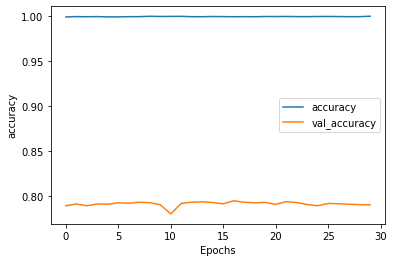

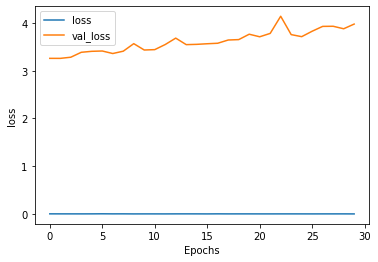

In [81]:
# plot
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


In [82]:
# tweak parameters

vocab_size = 10000
max_length = 16
embedding_dim = 16


# subwords

In [130]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info = True, as_supervised = True)

In [131]:
train_data, test_data = imdb['train'], imdb['test']

In [132]:
tokenizer = info.features['text'].encoder

In [108]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [109]:
sample_string = 'tensorflow, from basics to mastery'

In [110]:
tokenized = tokenizer.encode(sample_string)

In [111]:
tokenized

[943, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]

In [112]:
ori = tokenizer.decode(tokenized)

In [113]:
ori

'tensorflow, from basics to mastery'

In [115]:
for ts in tokenized:
    print('{} ----> {}'.format(ts, tokenizer.decode([ts])))

943 ----> ten
2327 ----> sor
2934 ----> flow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [118]:
buffer_size = 1000
batch_size = 64

train_dataset = train_data.shuffle(buffer_size)
train_dataset = train_dataset.padded_batch(batch_size, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(batch_size, tf.compat.v1.data.get_output_shapes(test_data))

In [121]:
embedding_dim = 64

In [123]:
# creating Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 16, 64)            640000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1560      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 25        
Total params: 641,585
Trainable params: 641,585
Non-trainable params: 0
_________________________________________________________________


In [124]:
num_epoch = 10
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(train_dataset, epochs = num_epoch, validation_data = test_dataset)


Epoch 1/10
391/391 [==============================] - 73s 186ms/step - loss: 0.6564 - accuracy: 0.6300 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 72s 184ms/step - loss: 0.4175 - accuracy: 0.8429 - val_loss: 0.3613 - val_accuracy: 0.8641
Epoch 3/10
391/391 [==============================] - 73s 186ms/step - loss: 0.2958 - accuracy: 0.8905 - val_loss: 0.3484 - val_accuracy: 0.8473
Epoch 4/10
391/391 [==============================] - 73s 187ms/step - loss: 0.2491 - accuracy: 0.9085 - val_loss: 0.3062 - val_accuracy: 0.8809
Epoch 5/10
391/391 [==============================] - 74s 189ms/step - loss: 0.2192 - accuracy: 0.9214 - val_loss: 0.3132 - val_accuracy: 0.8739
Epoch 6/10
391/391 [==============================] - 73s 186ms/step - loss: 0.1954 - accuracy: 0.9300 - val_loss: 0.3121 - val_accuracy: 0.8811
Epoch 7/10
391/391 [==============================] - 75s 192ms/step - loss: 0.1782 - accuracy: 0.9374 - val_loss: 0.3181 

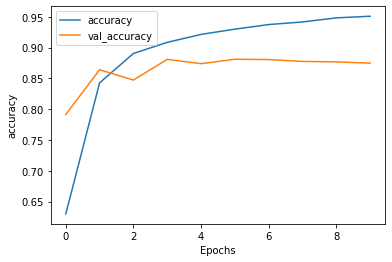

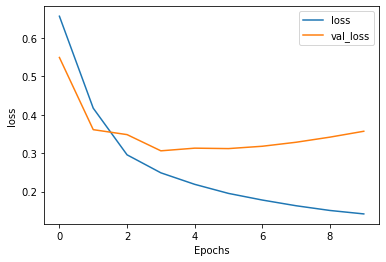

In [128]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# week 3

## continue from subwords  - LSTM very slow

In [136]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [137]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
num_epoch = 10
history = model.fit(train_dataset, epochs = num_epoch, validation_data = test_dataset)

Epoch 1/10
     73/Unknown - 715s 10s/step - loss: 0.6835 - accuracy: 0.5441

## continue from sarcasm dataset

In [10]:
#LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32), return_sequences = True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# week 4